## Setup

In [21]:
!pip install nibabel
!pip install pandas
!pip install nilearn
!pip install sklearn
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your depende

In [22]:
## Load packages

import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib as plt
from sklearn.utils import Bunch
from nilearn import image

In [23]:
## do you want the func 

def get_subject_id(sub_dir_name):
    return sub_dir_name.split('-')[1]

def get_subject_dirs(data_dir, exclude_subjects_prefix, n_subjects=None):
    # Ensure only directories are considered as subject directories
    subject_dirs = [
        os.path.join(data_dir, sub_dir) for sub_dir in os.listdir(data_dir)
        if sub_dir.startswith('sub-') and os.path.isdir(os.path.join(data_dir, sub_dir))
        and not any(get_subject_id(sub_dir).startswith(exclude) for exclude in exclude_subjects_prefix)
    ]

    if n_subjects:
        subject_dirs = subject_dirs[:n_subjects]
    
    return subject_dirs

def get_func_files(subject_dirs):
    func_files = []
    for sub_dir in subject_dirs:
        func_dir = os.path.join(sub_dir, 'func')
        if os.path.isdir(func_dir):
            func_files.extend([
                os.path.join(func_dir, f) for f in os.listdir(func_dir) 
                if f.endswith('.nii.gz') and 'echo' in f
            ])
    return func_files




In [24]:
#data_dir_2021 = '/work/FaceWord_fMRI/BIDS/derivatives' 
data_dir_2022 = '/work/raw/FaceWord_fMRI/BIDS_2022/derivatives'  
data_dir_2023 = '/work/raw/FaceWord_fMRI/BIDS_2023/derivatives'
data_dir_2024 = '/work/raw/FaceWord_fMRI/BIDS_2024/derivatives'


#exclude_subjects_prefix_2021 = ['0054', '0077', '0078', '0079', '0080', '0081', '0083', '0084', '0090','0091', '0092', '0093', '0094', '0096', '0097', '0098', '0099', '0100', '0101', '0103', '0104', '0105', '0106', '0107']
exclude_subjects_prefix_2022 = ['0054', '0057', '0059', '0060', '0062', '0064', '0065', '0066', '0090', '0091', '0079', '0058']
exclude_subjects_prefix_2023 = ['0057', '0058', '0059','0060', '0062', '0064', '0065', '0066', '0077', '0097']
exclude_subjects_prefix_2024 = ['0127', '0130']

n_subjects = None  # Or specify an integer, e.g., 10

# Get subject directories
#subject_dirs_21 = get_subject_dirs(data_dir_2021, exclude_subjects_prefix_2021, n_subjects)
subject_dirs_22 = get_subject_dirs(data_dir_2022, exclude_subjects_prefix_2022, n_subjects)
subject_dirs_23 = get_subject_dirs(data_dir_2023, exclude_subjects_prefix_2023, n_subjects)
subject_dirs_24 = get_subject_dirs(data_dir_2024, exclude_subjects_prefix_2024, n_subjects)

# Get functional files
#func_21 = get_func_files(subject_dirs_21)
func_22 = get_func_files(subject_dirs_22)
func_23 = get_func_files(subject_dirs_23)
func_24 = get_func_files(subject_dirs_24)


In [25]:
func = func_23 + func_24 + func_22 #+ func_21

In [26]:
import os
import glob

def get_subject_id(file_path):
    return file_path.split('/')[-3].split('-')[1]

def get_filtered_files(pattern, exclude_subjects):
    files = glob.glob(pattern)
    filtered_files = [
        file for file in files 
        if get_subject_id(file) not in exclude_subjects
    ]
    return filtered_files

# Define the pattern for the files you want to fetch
#pattern_21 = '/work/FaceWord_fMRI/BIDS/sub-*/func/*events.tsv'
pattern_22 = '/work/raw/FaceWord_fMRI/BIDS_2022/sub-*/func/*events.tsv'
pattern_23 = '/work/raw/FaceWord_fMRI/BIDS_2023/sub-*/func/*events.tsv'
pattern_24 = '/work/raw/FaceWord_fMRI/BIDS_2024/sub-*/func/*events.tsv'



# Get the filtered list of event file paths
#event_paths_21 = get_filtered_files(pattern_21, exclude_subjects_prefix_2021)
event_paths_22 = get_filtered_files(pattern_22, exclude_subjects_prefix_2022)
event_paths_23 = get_filtered_files(pattern_23, exclude_subjects_prefix_2023)
event_paths_24 = get_filtered_files(pattern_24, exclude_subjects_prefix_2024)


In [27]:
event_paths = event_paths_23 + event_paths_24 + event_paths_22 #+ event_paths_21

## Loading in files

In [28]:
# Initialize an empty list to store the DataFrames
dataframes = []

# Iterate over the list of files
for file in event_paths:
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file, sep='\t')
    # Append the DataFrame to the list
    dataframes.append(df)

# Now you have a list of DataFrames, one for each TSV file
for i, df in enumerate(dataframes):
    print(f"DataFrame {i}:\n", df.head(), "\n")


DataFrame 0:
        onset  duration trial_type  response_time     word  response  \
0   4.685903  0.685688  image_neg            NaN   ticket       NaN   
1  14.684771  0.687210  image_pos            NaN      tea       NaN   
2  27.285302  0.687399  image_neg            NaN  screech       NaN   
3  34.683918  0.689696  image_neg            NaN      mob       NaN   
4  44.686747  0.686829  image_pos            NaN     corn       NaN   

   correct_resp  gender  age  sub  ses  block  year  month  day  hour  minute  
0           NaN  female   20  107    1      5  2023      3   21    10      55  
1           NaN  female   20  107    1      5  2023      3   21    10      55  
2           NaN  female   20  107    1      5  2023      3   21    10      55  
3           NaN  female   20  107    1      5  2023      3   21    10      55  
4           NaN  female   20  107    1      5  2023      3   21    10      55   

DataFrame 1:
        onset  duration trial_type  response_time  word  respons

In [29]:
from nilearn import plotting
from nilearn.image import mean_img

#plotting.view_img(mean_img(fmri_filename), threshold=None)

In [30]:
## Fixing to words
words = ['word_pos', 'word_neg', 'word_neu'] 

df_filtered = []

for df in dataframes:  
# selecting rows based on condition 
    df = df[df['trial_type'].isin(words)] 
    df_filtered.append(df)

In [31]:
# Words

for df in df_filtered:
    # Creating the 'valence' column based on 'trial_type' values
    df['valence'] = df['trial_type'].apply(lambda x: 1 if x in ['word_pos', 'word_neg'] else 0)


/tmp/ipykernel_6369/2752685186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valence'] = df['trial_type'].apply(lambda x: 1 if x in ['word_pos', 'word_neg'] else 0)
/tmp/ipykernel_6369/2752685186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valence'] = df['trial_type'].apply(lambda x: 1 if x in ['word_pos', 'word_neg'] else 0)
/tmp/ipykernel_6369/2752685186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [32]:
for i in range(len(df_filtered)):
    # Keeping only the 'valence' and 'onset' columns
    df_filtered[i] = df_filtered[i][['valence', 'onset']]

In [33]:
# Convert to numpy array
cond = pd.concat(df_filtered)
cond_array = cond['valence'].values


In [34]:
concatenated_img = nib.load("/work/MattisThierionLund#7144/concatenated_img_without21.nii")

In [57]:
from nilearn.image import index_img
from nilearn.decoding import Decoder
import numpy as np

# Calculate the split index for 80/20 split
split_index = int(0.8 * len(cond_array))
data_shape = concatenated_img.shape
total_length = data_shape[-1]
split_index_img = int(0.8 * total_length)

# Split the data into training and testing sets
masked_data_train = index_img(concatenated_img, slice(0, split_index_img))
masked_data_test = index_img(concatenated_img, slice(split_index_img, total_length))
conditions_train = cond_array[:split_index]
conditions_test = cond_array[split_index:]

decoder = Decoder(
    estimator="logistic", standardize="zscore_sample", n_jobs =-1, mask=maskermasker)
decoder.fit(masked_data_train, conditions_train)

prediction = decoder.predict(masked_data_test)

# Calculate prediction accuracy
prediction_accuracy = (prediction == conditions_test).sum() / float(len(conditions_test))
print(f"Prediction Accuracy: {prediction_accuracy:.3f}")


/home/ucloud/.local/lib/python3.12/site-packages/nilearn/decoding/decoder.py:742: UserWarning: Brain mask is bigger than the volume of a standard human brain. This object is probably not tuned to be used on such data.
  selector = check_feature_screening(
/home/ucloud/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15800  48957  49278  58396  80212  83371  97022 114599 120042 137981
 152043 163435 178259 191072 213047 218245 230180 234703 235532 237734
 240201 244934 280397 284554 287431 293247 293799] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/ucloud/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/ucloud/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divi

Prediction Accuracy: 0.526


In [58]:
from sklearn.metrics import roc_auc_score, f1_score

if hasattr(decoder, "decision_function"):
    decision_scores = decoder.decision_function(masked_data_test)
    roc_auc = roc_auc_score(conditions_test, decision_scores)
else:
    # If using a classifier that supports predict_proba
    probabilities = decoder.predict_proba(masked_data_test)[:, 1]
    roc_auc = roc_auc_score(conditions_test, probabilities)

# Calculate F1 score
f1 = f1_score(conditions_test, prediction)

# Print scores
print(f"ROC AUC: {roc_auc:.3f}")
print(f"F1 Score: {f1:.3f}")

ROC AUC: 0.502
F1 Score: 0.599


Confusion Matrix:
[[316 284]
 [564 636]]


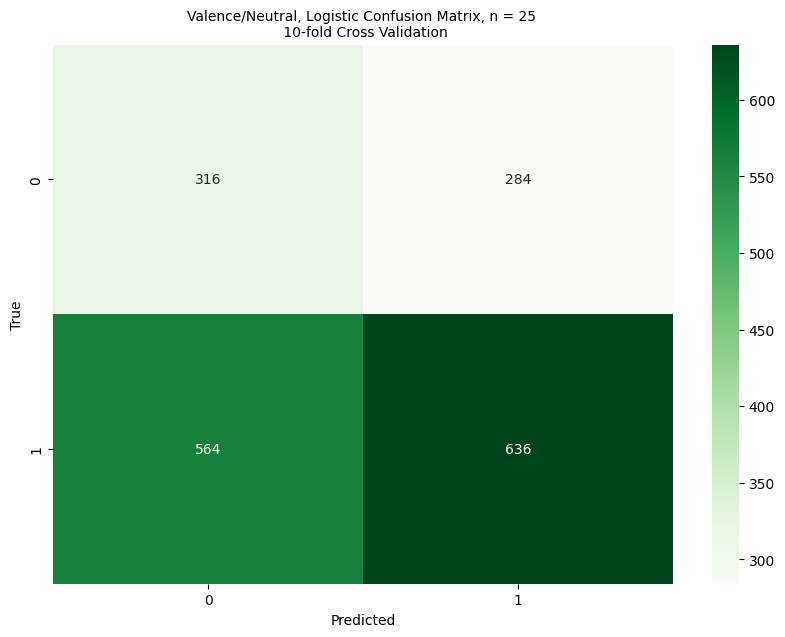

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(conditions_test, prediction)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Valence/Neutral, Logistic Confusion Matrix, n = 25 \n 10-fold Cross Validation', fontsize=10)
plt.show()

In [51]:
# Calculate the mean image for the background
mean_image = mean_img(concatenated_img)

# Retrieve the SVM weights from the decoder
weights = decoder.coef_

In [39]:
print(weights)

[[0. 0. 0. ... 0. 0. 0.]]


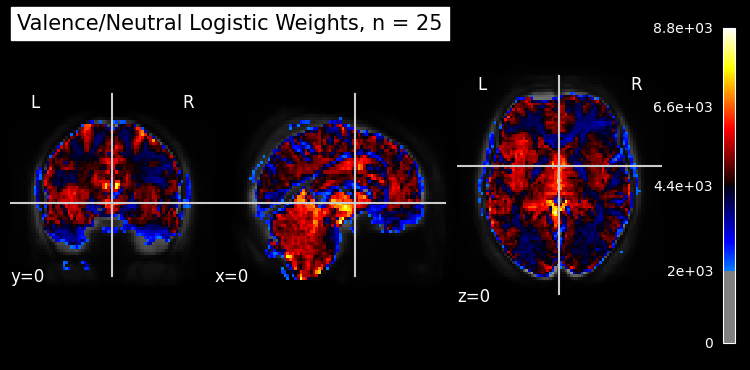

In [52]:
# Plot the SVM weights on the mean anatomical image
plotting.plot_stat_map(index_img(concatenated_img, 0), title="Valence/Neutral Logistic Weights, n = 25", 
                       display_mode="ortho", cut_coords=(0, -0, 0), 
                       threshold = 2000, bg_img=mean_image, 
                       colorbar=True, cmap='cold_hot',
                       black_bg=True)

plotting.show()